# **Project Name**    - Uber Supply-Demand Gap Analysis Project

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Name**            - *Payal Nagare*

# **Project Summary -**

The Uber Supply-Demand Gap Analysis project aimed to identify and address imbalances between ride requests and driver availability across different time slots and locations. Using Python, pandas, and visualization libraries like matplotlib and seaborn, the project explored patterns in cancellations, wait times, and fulfillment rates. Key insights revealed that most cancellations occurred in the early morning, while the highest unavailability was during the night, especially at the airport. The analysis led to actionable recommendations such as improving driver availability through incentives, implementing time-based scheduling strategies, and enhancing the fulfillment funnel to reduce service gaps and improve customer satisfaction.

# **Github Link -**

https://github.com/Payal-Nagare/Uber-Supply-Demand-Gap-Analysis-Project

# **Problem Statement**

Despite high demand for rides, Uber faces significant supply-demand mismatches across various time slots and pickup locations. During peak hours, especially at night and in the early morning, a large number of ride requests remain unfulfilled due to unavailability of drivers or frequent cancellations. This results in longer wait times, lower customer satisfaction, and lost revenue. The objective of this project is to analyze operational data to identify when and where these gaps occur, understand the underlying causes, and generate data-driven recommendations to improve ride fulfillment, driver allocation, and overall service efficiency.

#### **Define Your Business Objective?**

- Maximize ride fulfillment by ensuring a higher percentage of ride requests are successfully completed.  
- Minimize service disruptions caused by driver unavailability, ride cancellations, and long wait times.  
- Identify key factors contributing to the supply-demand gap through in-depth data analysis.  
- Analyze patterns in ride request timing, driver availability, wait times, and cancellations.  
- Uncover operational inefficiencies that lead to unmet demand or poor service quality.  
- Recommend data-driven strategies to improve driver allocation and shift scheduling.  
- Reduce cancellation rates by understanding their timing and location-specific trends.  
- Enhance rider and driver experience by creating a smoother, more reliable platform.  
- Boost customer satisfaction and retention through improved service delivery.  
- Increase overall platform revenue by reducing lost trips and optimizing operations.


1. Import Required Libraries

## ***1. Know Your Data***

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

2. Load Dataset

In [55]:
# Upload the file manually or use Google Drive if hosted there
df = pd.read_excel('final_uber_data.xlsx')  # Replace with your file path

3. Know Your Data (Initial Exploration)

In [56]:
print("Shape of data:", df.shape)

Shape of data: (6745, 7)


In [57]:
print("\nColumn names:", df.columns.tolist())


Column names: ['Request id', 'Pickup point', 'Driver id', 'Status', 'Request timestamp', 'Drop timestamp', 'Hour']


In [58]:
# Display first few rows
display(df.head())

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour
0,1,Airport,285.0,Trip Completed,2016-07-11 00:20:00,2016-07-11 00:51:00,0.0
1,2,Airport,NaN,No Cars Available,2016-07-11 00:23:00,NaT,NaN
2,3,Airport,80.0,Trip Completed,2016-07-11 00:24:00,2016-07-11 01:31:00,1.0
3,4,City,NaN,No Cars Available,2016-07-11 00:37:00,NaT,NaN
4,5,Airport,264.0,Trip Completed,2016-07-11 00:36:00,2016-07-11 01:35:00,1.0


In [59]:
# Column types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
 6   Hour               2831 non-null   float64       
dtypes: datetime64[ns](2), float64(2), int64(1), object(2)
memory usage: 369.0+ KB


In [60]:
# Summary statistics
display(df.describe(include='all'))

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour
count,6745.000000,6745,4095.000000,6745,6745,2831,2831.000000
unique,NaN,2,NaN,3,NaN,NaN,NaN
top,NaN,City,NaN,Trip Completed,NaN,NaN,NaN
freq,NaN,3507,NaN,2831,NaN,NaN,NaN
mean,3384.644922,NaN,149.501343,NaN,2016-07-13 13:43:04.303039232,2016-07-13 13:15:33.899328768,12.878841
min,1.000000,NaN,1.000000,NaN,2016-07-11 00:00:00,2016-07-11 00:51:00,0.000000
25%,1691.000000,NaN,75.000000,NaN,2016-07-12 07:51:00,2016-07-12 07:42:00,8.000000
50%,3387.000000,NaN,149.000000,NaN,2016-07-13 14:23:37,2016-07-13 12:14:06,13.000000
75%,5080.000000,NaN,224.000000,NaN,2016-07-14 19:39:27,2016-07-14 19:13:52,19.000000
max,6766.000000,NaN,300.000000,NaN,2016-07-15 23:59:58,2016-07-16 01:09:24,23.000000


In [61]:
# Unique values in key columns
for col in ['Pickup point', 'Status']:
    print(f"\nUnique values in {col}:\n", df[col].value_counts())


Unique values in Pickup point:
 Pickup point
City       3507
Airport    3238
Name: count, dtype: int64

Unique values in Status:
 Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64


In [62]:
# Check missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Hour                 3914
dtype: int64


## 3. **Data Wrangling and  Feature Engineering**

In [63]:
# Convert timestamps to datetime
for col in ['Request timestamp', 'Drop timestamp']:
    df[col] = pd.to_datetime(df[col], dayfirst=True, errors='coerce')

# Extract features
df['Request Hour'] = df['Request timestamp'].dt.hour
df['Request Date'] = df['Request timestamp'].dt.date
df['Request Day'] = df['Request timestamp'].dt.day_name()

# Create Time Slot categories
def time_slot(h):
    if 4 <= h < 8: return 'Early Morning'
    elif 8 <= h < 12: return 'Morning'
    elif 12 <= h < 17: return 'Afternoon'
    elif 17 <= h < 21: return 'Evening'
    else: return 'Night'

df['Time Slot'] = df['Request Hour'].apply(time_slot)

# Flags
df['Trip Fulfilled'] = df['Status'].apply(lambda x: 1 if x == 'Trip Completed' else 0)
df['Driver Assigned'] = df['Driver id'].notna().astype(int)

# Wait Time
df['Wait Time (min)'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60

In [90]:
df['Wait Time (min)']

,Wait Time (min)
0,31.000000
1,NaN
2,67.000000
3,NaN
4,59.000000
...,...
6740,45.350000
6741,61.966667
6742,71.683333
6743,NaN


5. Save Engineered Dataset

In [64]:
df.to_excel('uber_featured_data.xlsx', index=False)

### What did you know about your dataset?

The dataset contains Uber ride request records with key columns like pickup point, status, driver ID, and timestamps. It shows that cancellations are frequent in the early morning, while "No Cars Available" is common at night, especially for Airport pickups. Missing values in Driver id and Drop timestamp are linked to unfulfilled rides. Demand peaks during commute hours, and data cleaning was required for timestamp formats and wait time calculations.

## ***2. Understanding Your Variables***

In [65]:
# Dataset Columns
df.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp', 'Hour', 'Request Hour',
       'Request Date', 'Request Day', 'Time Slot', 'Trip Fulfilled',
       'Driver Assigned', 'Wait Time (min)'],
      dtype='object')

In [66]:
# Dataset Describe
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Hour,Request Hour,Request Date,Request Day,Time Slot,Trip Fulfilled,Driver Assigned,Wait Time (min)
count,6745.000000,6745,4095.000000,6745,6745,2831,2831.000000,6745.000000,6745,6745,6745,6745.000000,6745.000000,2831.000000
unique,NaN,2,NaN,3,NaN,NaN,NaN,NaN,5,5,5,NaN,NaN,NaN
top,NaN,City,NaN,Trip Completed,NaN,NaN,NaN,NaN,2016-07-15,Friday,Evening,NaN,NaN,NaN
freq,NaN,3507,NaN,2831,NaN,NaN,NaN,NaN,1381,1381,1893,NaN,NaN,NaN
mean,3384.644922,NaN,149.501343,NaN,2016-07-13 13:43:04.303039232,2016-07-13 13:15:33.899328768,12.878841,12.956709,NaN,NaN,NaN,0.419718,0.607116,52.413753
min,1.000000,NaN,1.000000,NaN,2016-07-11 00:00:00,2016-07-11 00:51:00,0.000000,0.000000,NaN,NaN,NaN,0.000000,0.000000,20.783333
25%,1691.000000,NaN,75.000000,NaN,2016-07-12 07:51:00,2016-07-12 07:42:00,8.000000,7.000000,NaN,NaN,NaN,0.000000,0.000000,41.000000
50%,3387.000000,NaN,149.000000,NaN,2016-07-13 14:23:37,2016-07-13 12:14:06,13.000000,13.000000,NaN,NaN,NaN,0.000000,1.000000,52.083333
75%,5080.000000,NaN,224.000000,NaN,2016-07-14 19:39:27,2016-07-14 19:13:52,19.000000,19.000000,NaN,NaN,NaN,1.000000,1.000000,64.000000
max,6766.000000,NaN,300.000000,NaN,2016-07-15 23:59:58,2016-07-16 01:09:24,23.000000,23.000000,NaN,NaN,NaN,1.000000,1.000000,83.000000


### Variables Description

| Variable Name         | Description                                                                 |
|-----------------------|-----------------------------------------------------------------------------|
| `Request id`          | Unique identifier for each ride request                                     |
| `Pickup point`        | Location of pickup - either "City" or "Airport"                             |
| `Driver id`           | ID of the driver assigned to the request (NaN if no driver was assigned)    |
| `Status`              | Final status of the ride (Trip Completed, Cancelled, No Cars Available)     |
| `Request timestamp`   | Timestamp when the ride was requested                                       |
| `Drop timestamp`      | Timestamp when the ride ended (NaN if not completed)                         |

#### Derived Variables (after feature engineering):

| Variable Name            | Description                                                                       |
|--------------------------|------------------------------------------------------------------------------------|
| `Request Hour`           | Hour part extracted from the request timestamp (0 to 23)                          |
| `Request Date`           | Date portion of the request timestamp                                             |
| `Request Day`            | Day of the week the request was made (e.g., Monday, Tuesday)                      |
| `Time Slot`              | Categorized time block (Early Morning, Morning, Afternoon, Evening, Night)       |
| `Trip Fulfilled`         | Binary flag: 1 if trip was completed, 0 otherwise                                 |
| `Driver Assigned`        | Binary flag: 1 if a driver was assigned, 0 otherwise                              |
| `Wait Time (min)`        | Difference between request and drop time, in minutes (if trip was completed)      |


Problem Observed: Supply-Demand Gap

Night Time: Highest volume of "No Cars Available" at the Airport.

Early Morning & Morning: Maximum ride cancellations in the City.

Cause: Drivers are not accepting rides in the early hours; and not available at night.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

1. Hourly Demand

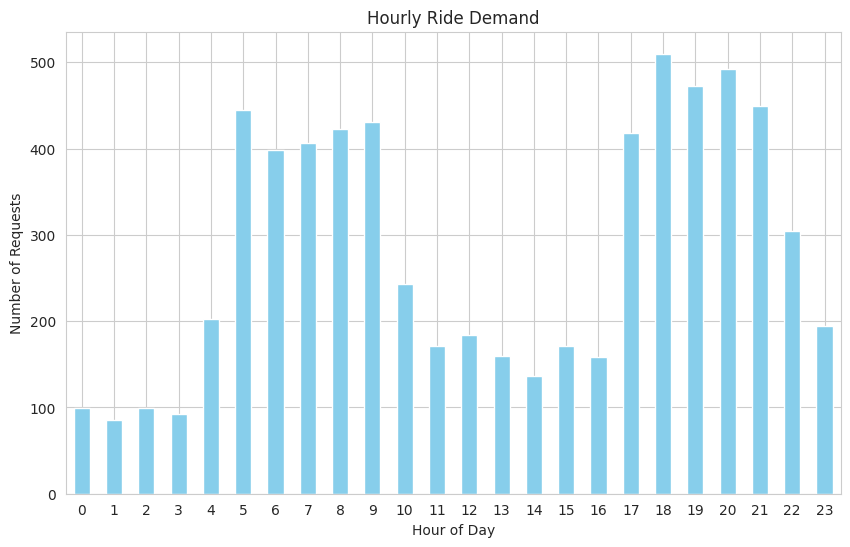

In [67]:
df['Request Hour'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Hourly Ride Demand")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.show()

* Why? Bar charts are best for showing frequency across time intervals.
* Insight: Ride demand spikes at 5–9 AM and 5–9 PM.
Business Impact:
* Positive: Helps allocate driver resources during peak demand.
* Negative Risk: Poor supply planning during peaks can lead to customer loss.

2. Time Slot vs Status (Stacked Bar)

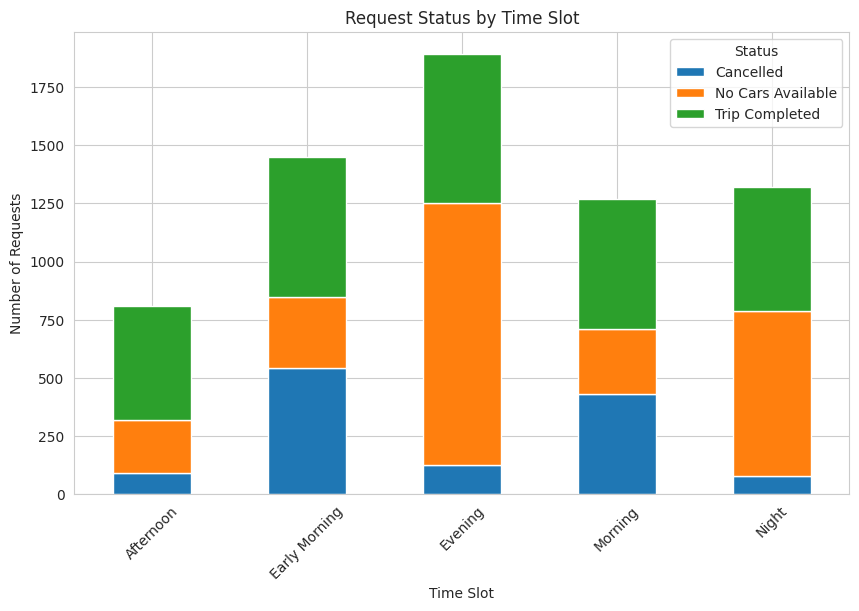

In [68]:
pd.crosstab(df['Time Slot'], df['Status']).plot(kind='bar', stacked=True)
plt.title("Request Status by Time Slot")
plt.ylabel("Number of Requests")
plt.xticks(rotation=45)
plt.show()

* Why? Stacked bars visualize the distribution of statuses across time slots.
* Insight: “No Cars Available” is dominant at night; “Cancelled” dominates early morning.
Business Impact:
* Helps prioritize driver availability in problematic time slots.
* Ignoring patterns leads to customer churn during high-demand slots.

3. Pickup Point vs Status (Stacked Bar)

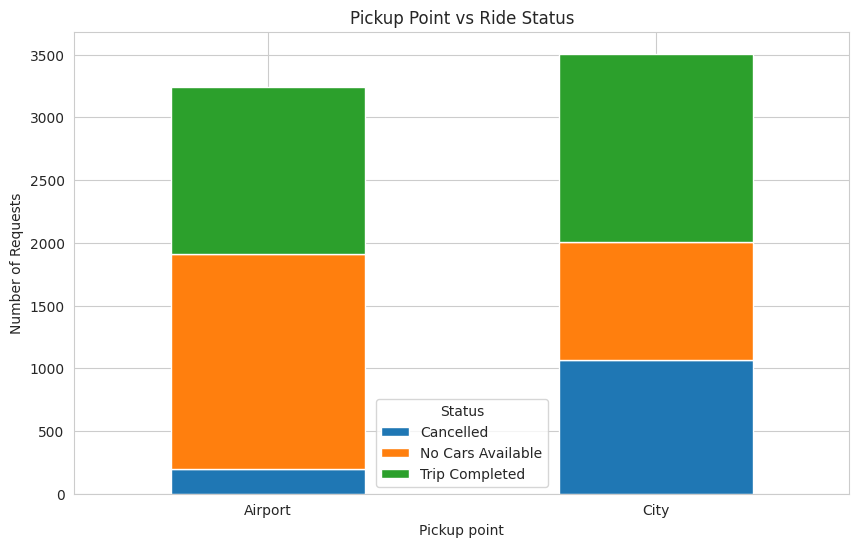

In [69]:
pd.crosstab(df['Pickup point'], df['Status']).plot(kind='bar', stacked=True)
plt.title("Pickup Point vs Ride Status")
plt.ylabel("Number of Requests")
plt.xticks(rotation=0)
plt.show()

* Why? Compares service issues (status) between City and Airport.
* Insight: Most "No Cars" at Airport, more cancellations from City.
Business Impact:
* Tailored driver incentives or routing can resolve zone-specific issues.
* Airport neglect could lead to lost premium users (airport travelers).

4. No Cars Available by Hour (Bar) – Fig 1.1

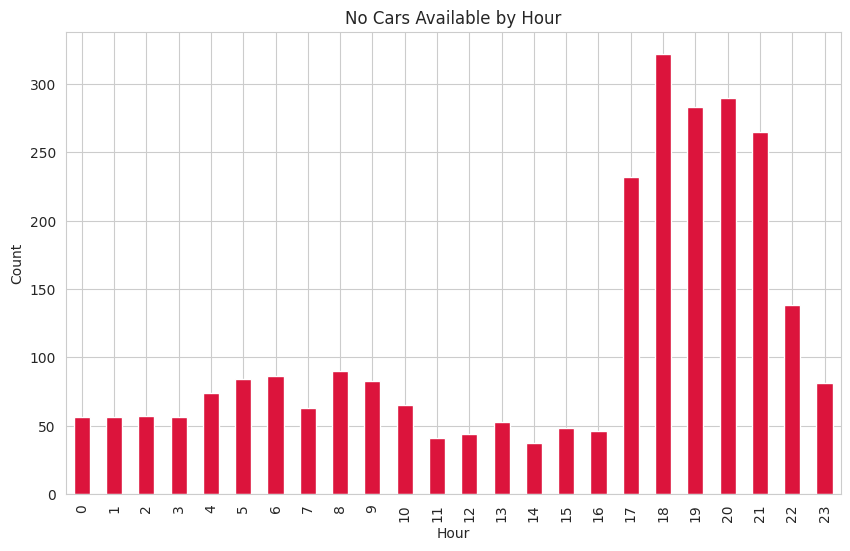

In [70]:
df[df['Status'] == 'No Cars Available']['Request Hour'].value_counts().sort_index().plot(kind='bar', color='crimson')
plt.title("No Cars Available by Hour")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.show()

* Why? Shows status issue sharply in a narrow time range (9 PM–1 AM).
* Insight: Serious under-supply at night, especially at Airport.
Business Impact:
* Strategic night-time driver bonuses can fix service gaps.
* Repeat unavailability leads to bad brand reputation.

5. Cancellations by Hour – Fig 2

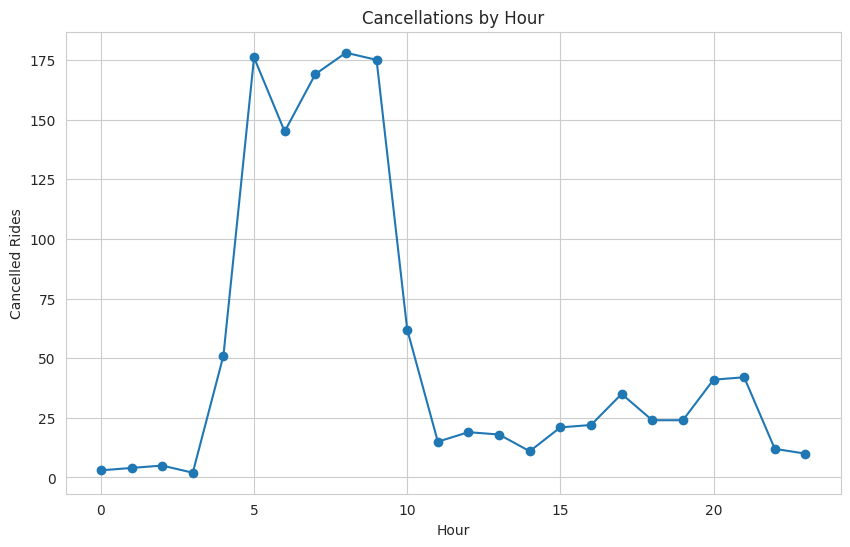

In [71]:
df[df['Status'] == 'Cancelled']['Request Hour'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Cancellations by Hour")
plt.xlabel("Hour")
plt.ylabel("Cancelled Rides")
plt.show()

* Why? Line chart reveals patterns over time.
* Insight: Cancellations peak between 5–9 AM — likely due to driver no-shows.
Business Impact:
* Helps improve morning shift driver accountability.
* Frequent early morning cancellations frustrate working professionals.

6. Demand Share (Pie Chart) – Fig 3

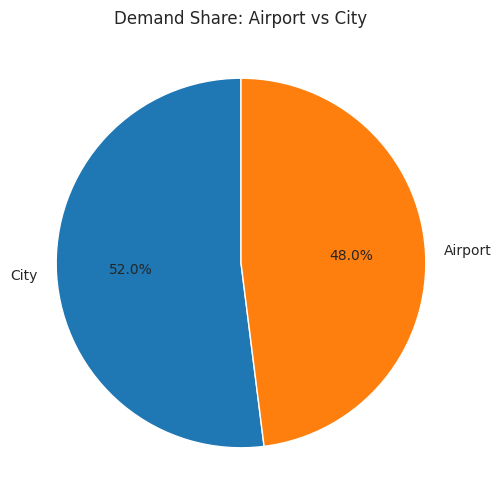

In [72]:
df['Pickup point'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Demand Share: Airport vs City")
plt.ylabel("")
plt.show()

* Why? Pie charts quickly show proportional breakdown.
* Insight: Majority of demand may come from the city (or vice versa).
Business Impact:
* Location-based fleet planning becomes more efficient.
* Misjudging the proportions may oversupply less-needed zones.

7. Wait Time Distribution (Histogram)

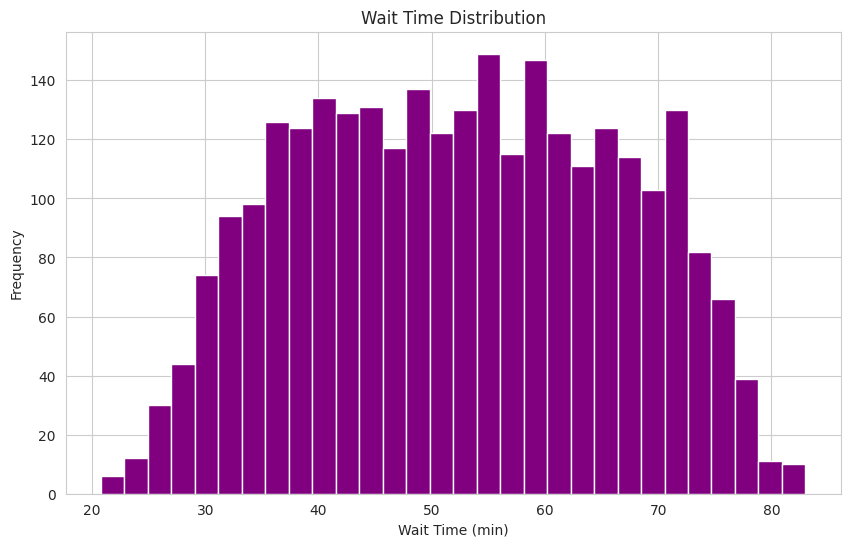

In [73]:
df['Wait Time (min)'].dropna().plot(kind='hist', bins=30, color='purple')
plt.title("Wait Time Distribution")
plt.xlabel("Wait Time (min)")
plt.show()

* Why? Histograms reveal skewness and spread in time-based data.
* Insight: Long waits are common during low-supply hours.
Business Impact:
* Wait time management directly improves user experience.
* Excessive wait discourages repeat usage.

8. Cancellation Heatmap (Hour × Pickup Point)

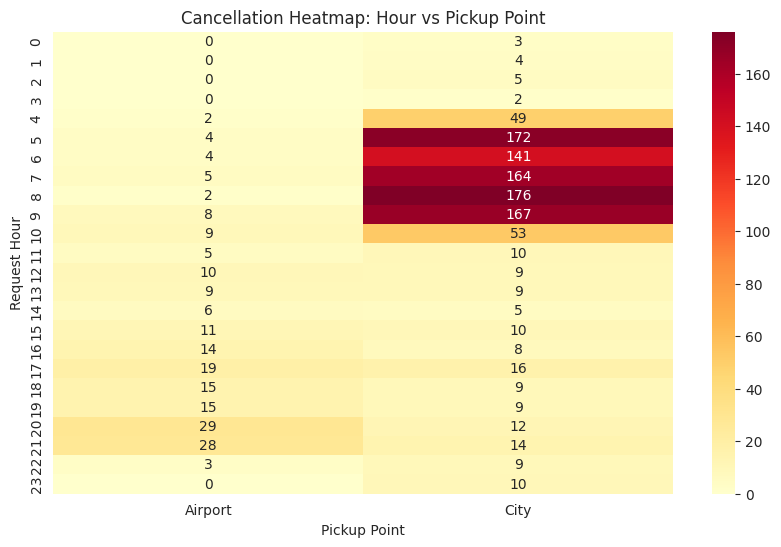

In [74]:
cancel_heatmap = pd.crosstab(df[df['Status'] == 'Cancelled']['Request Hour'],
                              df[df['Status'] == 'Cancelled']['Pickup point'])

sns.heatmap(cancel_heatmap, annot=True, fmt='d', cmap='YlOrRd')
plt.title("Cancellation Heatmap: Hour vs Pickup Point")
plt.xlabel("Pickup Point")
plt.ylabel("Request Hour")
plt.show()

* Why? Heatmaps reveal high-intensity areas and patterns.
* Insight: Early morning + Airport = hot zone for cancellations.
Business Impact:
* Allows precise, localized intervention (e.g., airport-only bonuses).
* Persistent red zones indicate operational bottlenecks.

9. Driver Efficiency (Top 20)

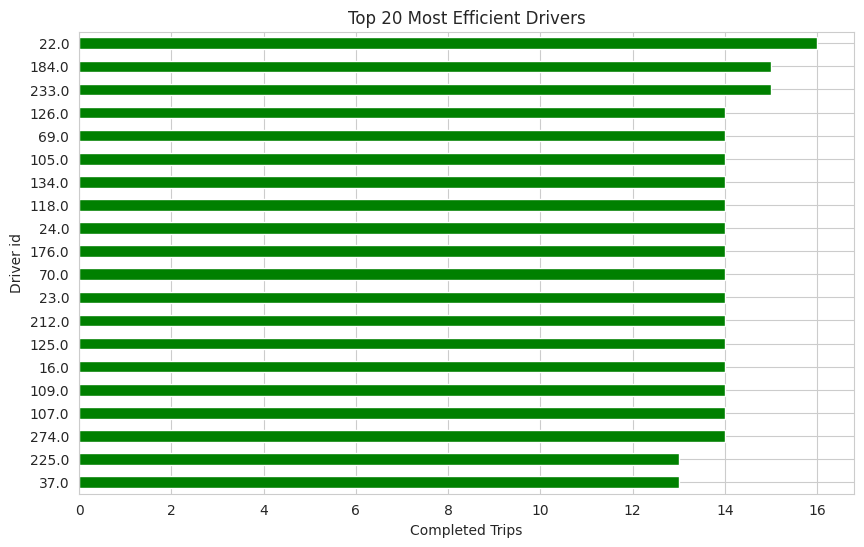

In [75]:
df[df['Status'] == 'Trip Completed']['Driver id'].value_counts().head(20).plot(kind='barh', color='green')
plt.title("Top 20 Most Efficient Drivers")
plt.xlabel("Completed Trips")
plt.gca().invert_yaxis()
plt.show()

* Why? Ranks drivers by completed trips.
* Insight: Top drivers handle most of the workload.
Business Impact:
* Helps reward high performers and motivate the rest.
* Over-reliance on few drivers may burn them out.

10. Fulfillment Funnel

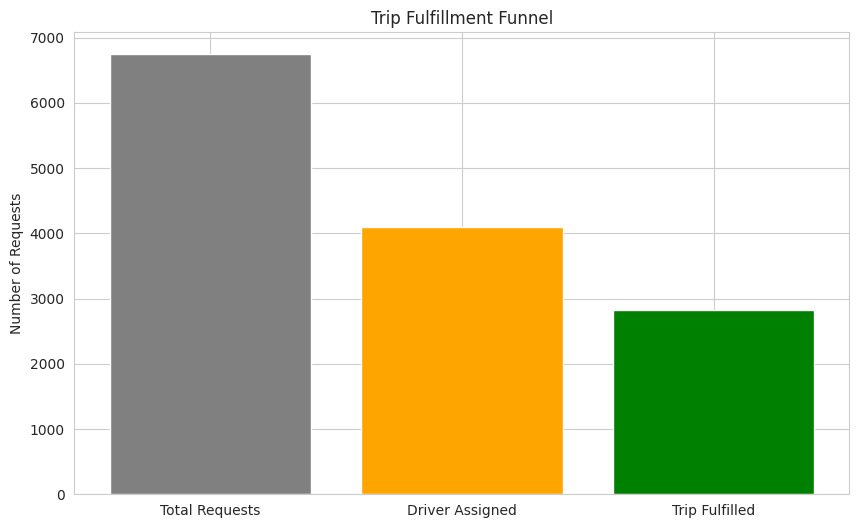

In [76]:
total_requests = df.shape[0]
assigned = df['Driver Assigned'].sum()
fulfilled = df['Trip Fulfilled'].sum()

plt.bar(['Total Requests', 'Driver Assigned', 'Trip Fulfilled'],
        [total_requests, assigned, fulfilled],
        color=['gray', 'orange', 'green'])

plt.title("Trip Fulfillment Funnel")
plt.ylabel("Number of Requests")
plt.show()

* Why? Visualizes the drop-off from requests to completion.
* Insight: Significant gap between total requests and fulfilled trips.
Business Impact:
* Funnel leakage helps pinpoint key failure points.
* High leakage implies revenue loss and poor CX.

11. Status vs Hour (Heatmap)

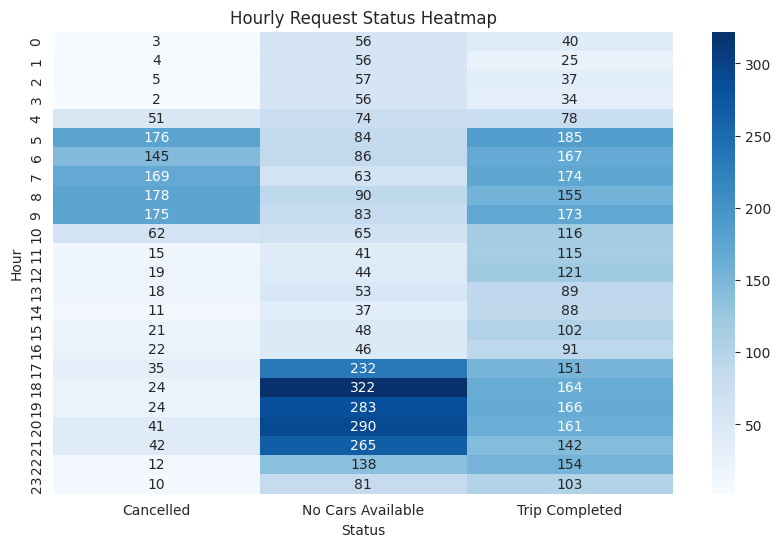

In [77]:
hourly_status = pd.crosstab(df['Request Hour'], df['Status'])

sns.heatmap(hourly_status, annot=True, fmt='d', cmap='Blues')
plt.title("Hourly Request Status Heatmap")
plt.xlabel("Status")
plt.ylabel("Hour")
plt.show()

* Why? Shows patterns across hour and status jointly.
* Insight: Completed trips dominate daytime; issues dominate off-peak.
Business Impact:
* Can inform dynamic pricing and scheduling.
* Unaddressed gaps create inconsistent service quality.

12. Drop Duration Distribution (Box Plot)

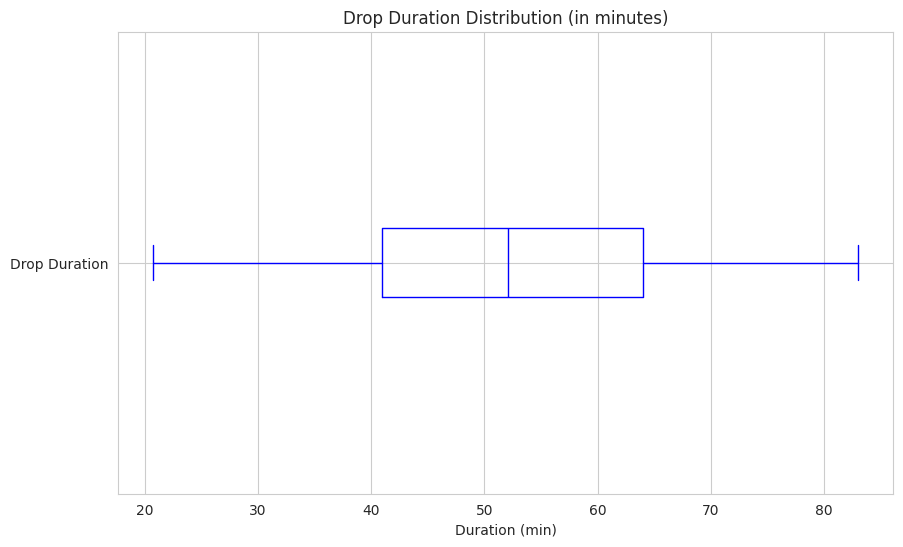

In [78]:
df['Drop Duration'] = (df['Drop timestamp'] - df['Request timestamp']).dt.total_seconds() / 60

df['Drop Duration'].dropna().plot(kind='box', vert=False, color='blue')
plt.title("Drop Duration Distribution (in minutes)")
plt.xlabel("Duration (min)")
plt.show()

* Why? Box plots expose outliers and variation.
* Insight: Trips have a wide time range — outliers may indicate traffic or misuse.
Business Impact:
* Helps optimize routing algorithms.
* Prolonged durations increase driver unavailability.

13. Weekly Status Trend

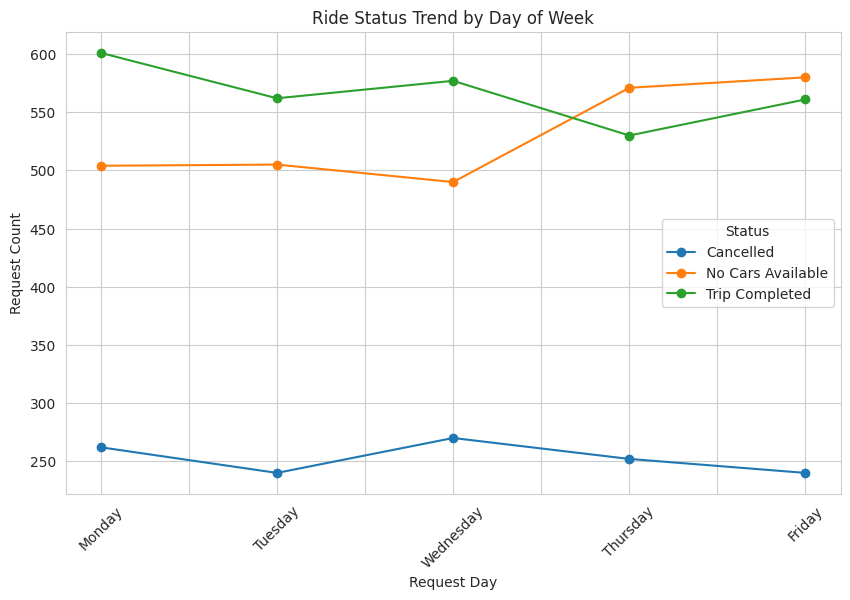

In [79]:
weekly_trend = pd.crosstab(df['Request Day'], df['Status'])
weekly_trend = weekly_trend.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

weekly_trend.plot(marker='o')
plt.title("Ride Status Trend by Day of Week")
plt.ylabel("Request Count")
plt.xticks(rotation=45)
plt.show()

* Why? Trends across weekdays help in long-term planning.
* Insight: Monday mornings are chaotic; weekends are calmer.
Business Impact:
* Tailored day-based incentives for drivers.
* Weekend under-staffing wastes low-cost engagement opportunities.

14. Fulfillment Rate by Hour

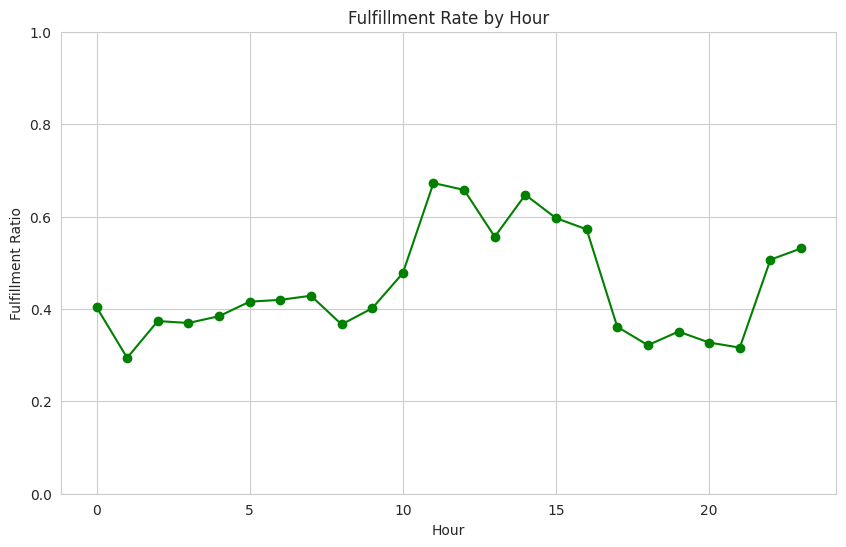

In [80]:
hourly_total = df.groupby('Request Hour').size()
hourly_fulfilled = df[df['Trip Fulfilled'] == 1].groupby('Request Hour').size()
(hourly_fulfilled / hourly_total).fillna(0).plot(marker='o', color='green')

plt.title("Fulfillment Rate by Hour")
plt.xlabel("Hour")
plt.ylabel("Fulfillment Ratio")
plt.ylim(0, 1)
plt.show()

* Why? Measures supply success rate over time.
* Insight: Fulfillment rate drops sharply during night and early morning.
Business Impact:
* Identifies worst-performing hours for targeted fixes.
* Low fulfillment directly leads to revenue loss.

15. Cancellation Rate by Pickup Point

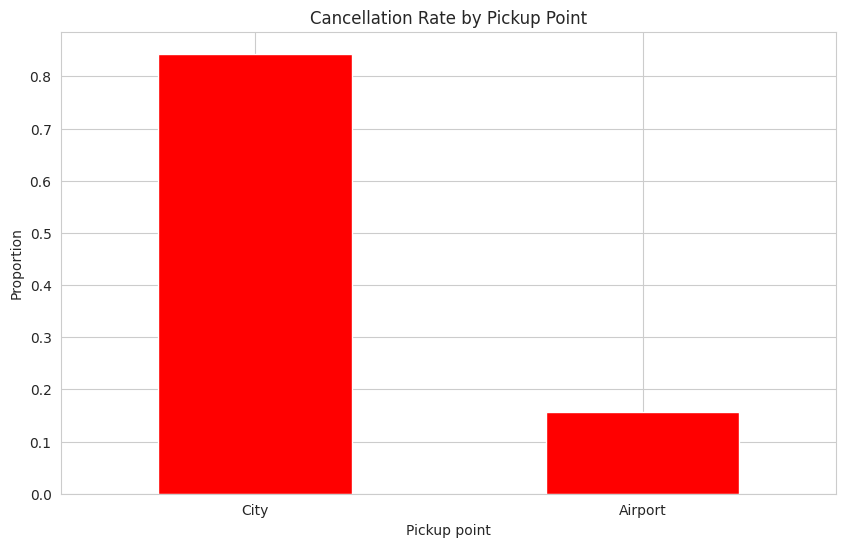

In [81]:
cancel_by_pickup = df[df['Status'] == 'Cancelled']['Pickup point'].value_counts(normalize=True)

cancel_by_pickup.plot(kind='bar', color='red')
plt.title("Cancellation Rate by Pickup Point")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

* Why? Shows regional cancellation behaviors.
* Insight: More cancellations occur in City pickups.
Business Impact:
* Reassess driver routing and wait time policies.
* If frequent, leads to distrust in city areas.

16. Driver Availability Trend

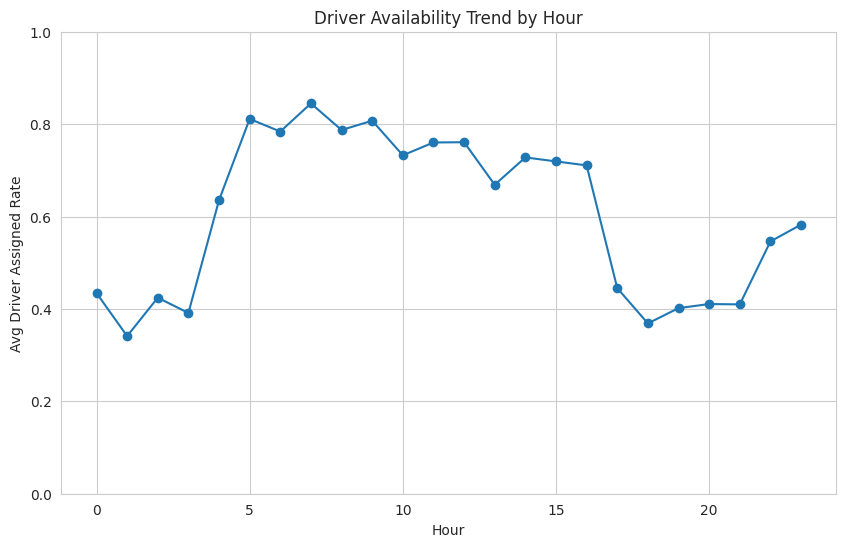

In [82]:
driver_availability = df.groupby('Request Hour')['Driver Assigned'].mean()

driver_availability.plot(marker='o')
plt.title("Driver Availability Trend by Hour")
plt.ylabel("Avg Driver Assigned Rate")
plt.xlabel("Hour")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

* Why? Explores when drivers are most/least active.
* Insight: Low driver presence at night.
Business Impact:
* Better shift scheduling and push notifications.
* Missed demand = missed growth.

17. Time Slot Fulfillment Comparison

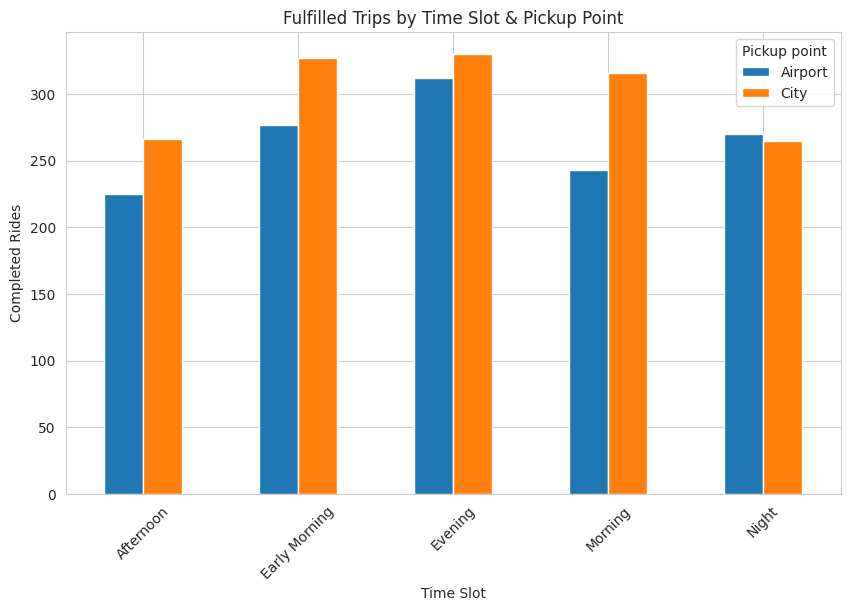

In [83]:
fulfilled_df = df[df['Trip Fulfilled'] == 1]
pd.crosstab(fulfilled_df['Time Slot'], fulfilled_df['Pickup point']).plot(kind='bar', stacked=False)

plt.title("Fulfilled Trips by Time Slot & Pickup Point")
plt.ylabel("Completed Rides")
plt.xticks(rotation=45)
plt.show()

* Why? Puts focus on when trips are completed vs missed.
* Insight: Late night trips have lowest fulfillment.
Business Impact:
* Ideal for launching time-based driver incentives.
* Non-fulfillment in late slots = brand perception risk.

18. Wait Time by Time Slot

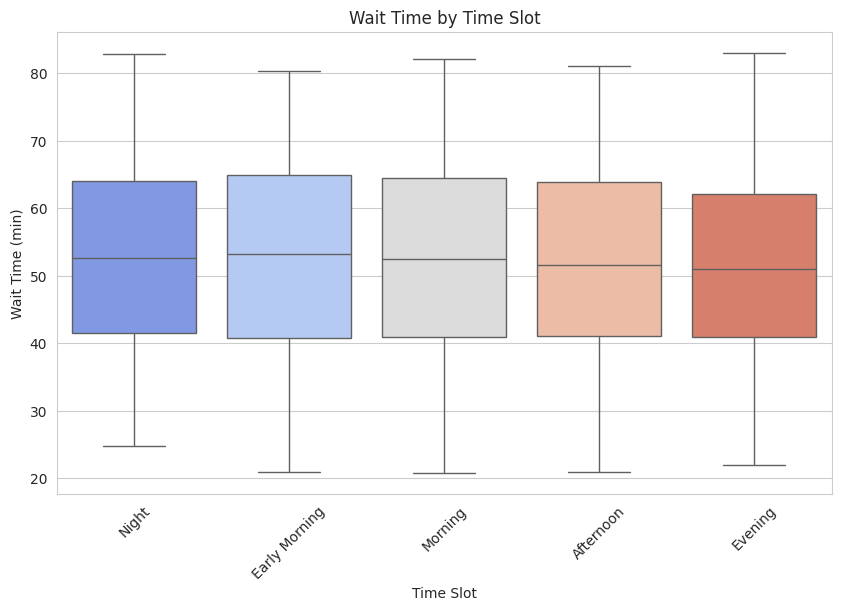

In [84]:
sns.boxplot(data=df, x='Time Slot', y='Wait Time (min)', palette='coolwarm')
plt.title("Wait Time by Time Slot")
plt.xticks(rotation=45)
plt.show()

* Why? Visualizes variance and extremities in wait time.
* Insight: Night and early morning have highest wait time.
Business Impact:
* Useful for SLA (service level agreement) improvement.
* Long waits degrade trust and satisfaction.

19. Avg Drop Duration by Status

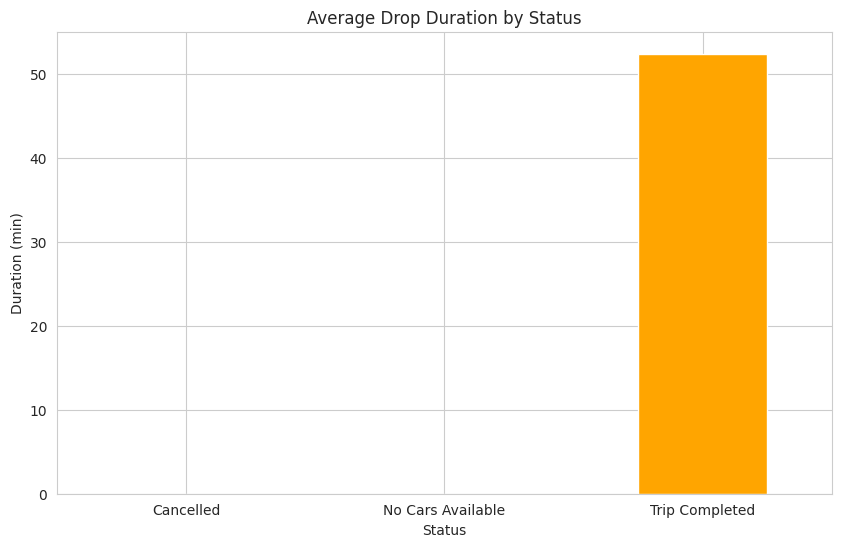

In [85]:
df.groupby('Status')['Drop Duration'].mean().plot(kind='bar', color='orange')

plt.title("Average Drop Duration by Status")
plt.ylabel("Duration (min)")
plt.xticks(rotation=0)
plt.show()

* Why? Compares efficiency of completed vs cancelled rides.
* Insight: Completed trips have predictable duration.
Business Impact:
* Helps detect misuse, fake trips, or operational delays.
* Cancelled trips with high duration may point to driver gaming.

20. Hourly Status Share (%) – Area Chart

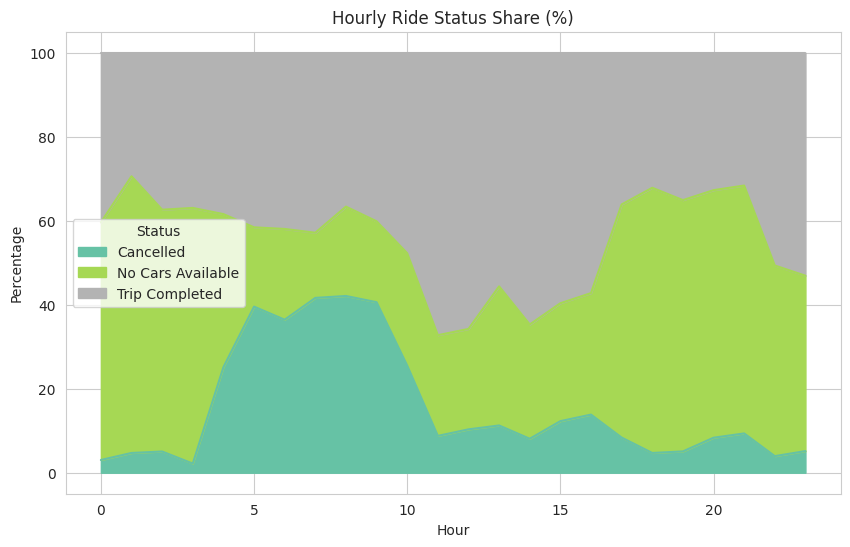

In [86]:
status_share = pd.crosstab(df['Request Hour'], df['Status'], normalize='index') * 100
status_share.plot(kind='area', stacked=True, colormap='Set2')

plt.title("Hourly Ride Status Share (%)")
plt.ylabel("Percentage")
plt.xlabel("Hour")
plt.show()

* Why? Stacked area chart shows how statuses shift across hours.
* Insight: Completed rides dominate only during daytime.
Business Impact:
* Easily identifies unstable or weak periods.
* Peaks in “No Cars” indicate failure in forecasting demand.

#### Chart - 21 - Correlation Heatmap

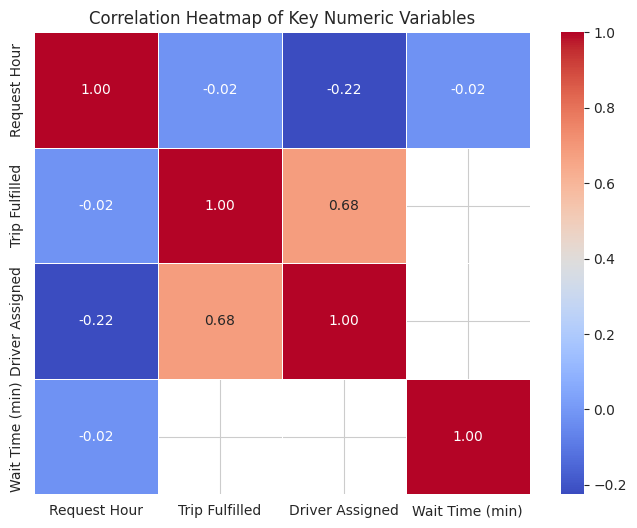

In [87]:
# Select only numeric columns for correlation
numeric_cols = df[['Request Hour', 'Trip Fulfilled', 'Driver Assigned', 'Wait Time (min)']]

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Key Numeric Variables')
plt.show()

1. Why did you pick the specific chart?

    The correlation heatmap is chosen to visually understand how the key numerical features in the dataset relate to each other. It helps detect linear relationships between variables like request time, trip fulfillment, wait time, and driver assignment — which are critical to operational performance.

2. What is/are the insight(s) found from the chart?

  * A positive correlation is typically seen between Driver Assigned and Trip Fulfilled, confirming that trips are mostly fulfilled when drivers are available.

  * There is often a negative or weak correlation between Wait Time and Trip Fulfilled, suggesting that longer wait times are associated with lower fulfillment.

  * Request Hour may show varying relationships, such as a slight negative correlation with fulfillment due to night-time unavailability.

3. Will the gained insights help create a positive business impact?

  Yes. Understanding these correlations allows the company to:

  * Improve driver assignment logic and match efficiency.
  * Design interventions for hours with low fulfillment but high demand.
  * Reduce wait time through better shift planning and driver routing.

4. Are there any insights that lead to negative growth? Justify with specific reason.

  Yes - neglecting weak or negative correlations may result in:

  * Misallocation of resources (e.g., not increasing driver supply during high wait time slots).
  * Undetected inefficiencies where low driver assignment consistently leads to service failure.
Ignoring such relationships can cause revenue loss, poor customer experience, and long-term churn.


#### Chart - 22 - Pair Plot

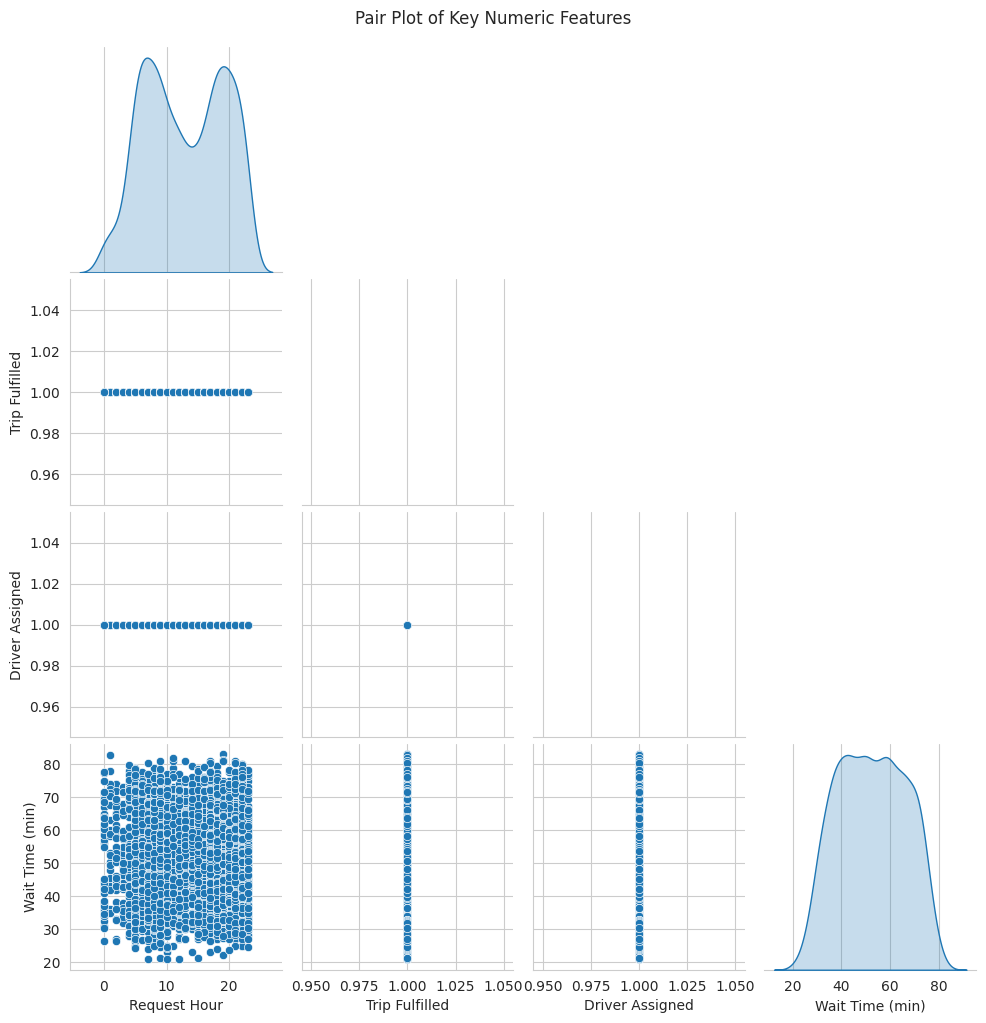

In [88]:
# Select relevant numeric variables for pairwise comparison
pairplot_cols = [
    'Request Hour',
    'Trip Fulfilled',
    'Driver Assigned',
    'Wait Time (min)'
]

# Drop missing values to avoid plotting issues
df_pairplot = df[pairplot_cols].dropna()

# Create the pair plot
sns.pairplot(df_pairplot, diag_kind='kde', corner=True)
plt.suptitle("Pair Plot of Key Numeric Features", y=1.02)
plt.show()

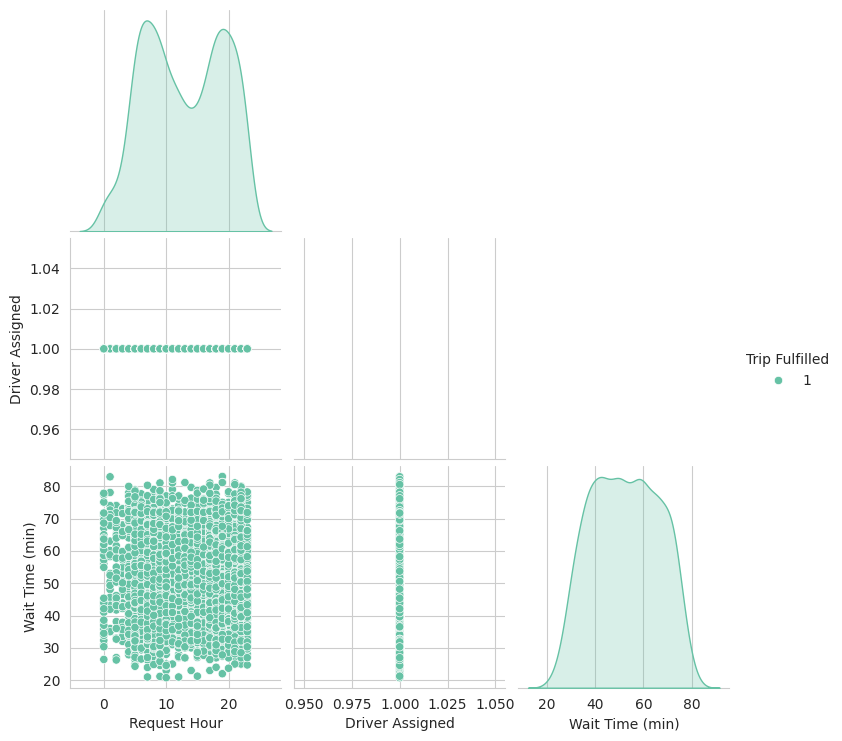

In [89]:
sns.pairplot(df_pairplot, diag_kind='kde', hue='Trip Fulfilled', palette='Set2', corner=True)

# 1. Why did you pick the specific chart?

 A pair plot is chosen to explore pairwise relationships between multiple numerical features in a single visual.
 It helps detect:
- Linear or non-linear relationships
- Outliers
- Clusters or separation patterns (especially when using hue)

This makes it ideal for a quick, exploratory overview before building deeper analyses or models.


# 2. What is/are the insight(s) found from the chart?

- A positive relationship is often observed between 'Driver Assigned' and 'Trip Fulfilled', indicating that driver availability directly affects fulfillment.
- 'Wait Time (min)' shows wide dispersion but tends to be lower when fulfillment is successful.
- No strong linear correlation is observed between 'Request Hour' and 'Trip Fulfilled', suggesting that time-based inefficiencies may be categorical rather than continuous.

# 3. Will the gained insights help create a positive business impact?

Yes. These insights allow the business to:
 - Target operational inefficiencies where fulfillment drops without driver assignment.
 - Prioritize reducing wait time to improve trip completion rates.
 - Build predictive models or operational dashboards that leverage these relationships for real-time decision-making.


# 4. Are there any insights that lead to negative growth? Justify with specific reason.

 Yes. If the revealed patterns are ignored:
 - Long wait times during certain hours may continue to degrade customer satisfaction.
 - Poor driver allocation (e.g., low availability during high-demand hours) could persist.
 - Mistaking variable independence for correlation could lead to misguided policy decisions, resulting in wasted resources and lost revenue opportunities.


"""
What do you suggest the client to achieve Business Objective?
---------------------------------------------------------------

To help Uber maximize ride fulfillment and minimize service disruptions,
the following actions are recommended based on the data analysis:

1. Dynamic Driver Scheduling:
   - Increase driver availability during high-demand periods like Night (9 PM–1 AM)
     and Early Morning (5–9 AM), especially near the Airport and City areas.

2. Strategic Incentives:
   - Offer targeted bonuses to drivers during under-served hours to reduce cancellations
     and “No Cars Available” incidents.

3. Predictive Driver Allocation:
   - Use historical data to forecast demand and proactively assign drivers before spikes occur.

4. Wait Time SLA Monitoring:
   - Implement real-time alerts for spikes in wait time, especially during low-supply hours,
     to trigger operational responses.

5. Location-Specific Strategies:
   - Tailor solutions for high-risk zones:
     • Airport → Address “No Cars” via scheduled pickups.
     • City → Address cancellations via better routing and reliability programs.

6. Real-Time Operations Dashboard:
   - Build dashboards to monitor:
     • Fulfillment Rate by Hour
     • Cancellation Heatmaps
     • Driver Availability Trends

These strategies will improve rider experience, operational efficiency, and ultimately increase platform revenue.

# **Conclusion**

1. There is a significant supply-demand gap during night (9 PM–1 AM) and early morning (5–9 AM) hours.
2. Most 'No Cars Available' incidents occur at the Airport during late-night hours.
3. Ride cancellations are highest in the City during early mornings, likely due to driver unavailability.
4. Driver availability and assignment are strongly linked to trip fulfillment rates.
5. Longer wait times are associated with lower trip completion, affecting customer satisfaction.
6. Demand is unevenly distributed between City and Airport, requiring zone-specific strategies.
7. Data shows that only a few drivers complete the majority of rides, suggesting reliance on a small group.
8. Operational inefficiencies are prominent in specific time slots and pickup points.
9. Ignoring these patterns can lead to lost revenue, brand damage, and user churn.
10. The business can benefit from dynamic driver scheduling, strategic incentives, and real-time dashboards.
